In [51]:
import numpy as np 
import matplotlib.pyplot as plt 

from scipy.ndimage.filters import convolve

# add src to path
sys.path.append('../..')
from utils.db_helper import get_image_data

In [52]:
SOURCE_DIR_V1 = "C:/database/StyleGanv1"
SOURCE_DIR_V2 = "C:/database/StyleGanv2"
SOURCE_DIR_FFHQ = "C:/database/FFHQ"

In [57]:
ffhq_datagen = get_image_data(SOURCE_DIR_FFHQ, type = 'int')

In [82]:
def calculate_difference_image(np_img: np.ndarray)-> np.ndarray:
    """
    np_img must be int not float
    """
    np_filter = np.array((1,-1)).reshape(1,2)
    np_img = np_img.astype(np.int16)
    np_diff_img = np.empty(np_img.shape, dtype=np.int16)
    if len(np_img.shape) == 3:
        for i in range(np_img.shape[-1]):
            np_diff_img[:,:,i] = convolve(np_img[:,:,i], np_filter)
    elif len(np_img.shape) == 2:
        np_diff_img = convolve(np_img, np_filter)
    else:
        raise ValueError('Bad shape of the image')
    return np_diff_img

In [143]:
def avg_hist_from_diff_img(src_path: str, max_number_of_images = 10, bins=100)-> np.ndarray:
    print("Loading dataset...")
    dataset_gen = get_image_data(src_path, type='int')
    print("Processing database...")
    number_of_images = 0
    np_avg_hist = np.zeros((bins,), dtype=np.float64)
    for img in dataset_gen:
        diff_img = calculate_difference_image(img)
        hist, _ = np.histogram(diff_img, density=True, bins=bins)
        np_avg_hist += hist
        number_of_images += 1
        if np_avg_hist > 0.95*np.finfo(np_avg_hist.dtype).max:
            raise ValueError("Dataset to large")
            break
        elif number_of_images == max_number_of_images:
            print("Finish calcluating avg histogram")
            break
    return np_avg_hist / number_of_images


In [111]:
img = next(ffhq_datagen)
new_img = calculate_difference_image(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


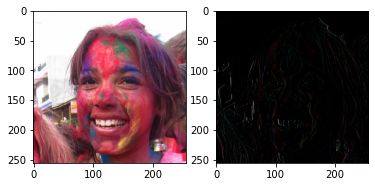

In [114]:
fig, axes = plt.subplots(ncols=2)
axes[0].imshow(img, vmin=0, vmax=255)
axes[1].imshow(new_img, vmin=0, vmax=255)
plt.show()

In [142]:
np_hist, np_bins = np.histogram(new_img[:,:,2], density=True, bins=100)
np_hist.shape

(100,)

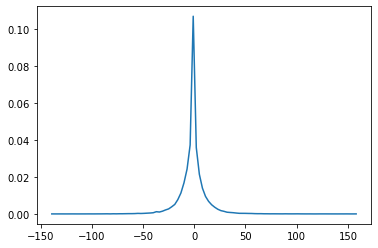

In [140]:
fig, ax = plt.subplots()
ax.plot(np_bins[:-1], np_hist)


In [108]:
np.finfo(np.float64).max

1.7976931348623157e+308

In [107]:
np_hist.sh

dtype('float64')